Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


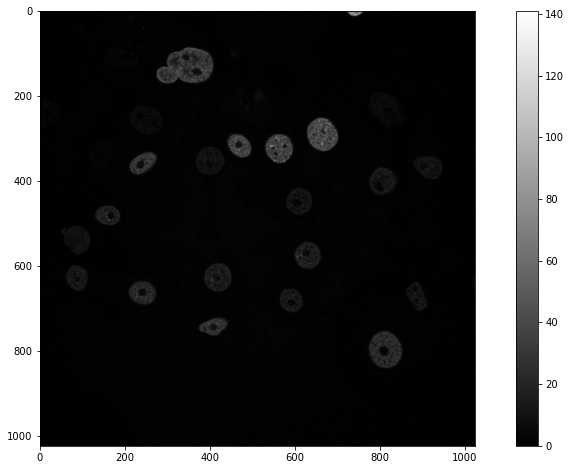

In [2]:
%pylab
%matplotlib inline
import skimage.io as sk

img = sk.imread("Data/N2DH-GOWT1/img/t01.tif") #Versuch Bild zu laden

def show_image(img, x, y):
    figure(figsize=(x,y))
    imshow(img, "gray")
    colorbar()

show_image(img, 15, 8)

In [3]:
def standarddeviation_old(img, size): # Größe der Filtermaske, Seitenlänge
    result = numpy.zeros(img.shape) # Resultat-Bild gleich groß wie Eingangs-Bild
    n = (size - 1) // 2
    for p in ndindex(img.shape): # gibt für jedes Pizel ein Tupel mit (Reihe, Spalte)
        neighborhood_sum = 0
        mean = 0
        deviation = 0
        if p[0]-n >= 0 and p[1]-n >= 0 and p[0]+n <= img.shape[0] -1 and p[1]+n <= img.shape[1] -1: # Keine Randpixel
            for q in ndindex(size, size):
                i = p[0]-n + q[0]
                j = p[1]-n + q[1]
                neighborhood_sum += img[i,j]
            mean = neighborhood_sum/(size**2)
            for q in ndindex(size, size):
                i = p[0]-n + q[0]
                j = p[1]-n + q[1]
                deviation += (img[i,j] - mean)**2

            result[p] = sqrt(1/(size**2) * deviation)
    return result
sd_test = standarddeviation_old(img,3)

In [5]:
def standarddeviation_new(img, size): # Größe der Filtermaske, Seitenlänge
    result = numpy.zeros(img.shape) # Resultat-Bild gleich groß wie Eingangs-Bild
    n = (size - 1) // 2
    for p in ndindex(img.shape): # gibt für jedes Pizel ein Tupel mit (Reihe, Spalte)
        neighborhood_sum = []
        mean_new = 0
        deviation = 0
        if p[0]-n >= 0 and p[1]-n >= 0 and p[0]+n <= img.shape[0] -1 and p[1]+n <= img.shape[1] -1: # Keine Randpixel
            for q in ndindex(size, size):
                i = p[0]-n + q[0]
                j = p[1]-n + q[1]
                neighborhood_sum.append(img[i,j])
            mean_new = mean(neighborhood_sum)
            for q in ndindex(size, size):
                i = p[0]-n + q[0]
                j = p[1]-n + q[1]
                deviation += (img[i,j] - mean_new)**2

            result[p] = sqrt(1/(size**2) * deviation)
    return result
sd_test = standarddeviation_new(img,3)

In [ ]:
%timeit standarddeviation_old(img,3)
%timeit standarddeviation_new(img,3)